<a href="https://colab.research.google.com/github/manelB1/AnaliseExplicita/blob/main/AnaliseExplicita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS

In [ ]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
df = pd.read_csv('cars_dataset.csv')

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [ ]:
df_group = df.groupby('Make')

In [ ]:
df_group.describe().transpose()

In [ ]:
#Agrupando por marca
audi = df_group.get_group('audi')
BMW = df_group.get_group('BMW')
Ford = df_group.get_group('Ford')
Hyundai = df_group.get_group('Hyundai')
skoda = df_group.get_group('skoda')
toyota = df_group.get_group('toyota')
vw = df_group.get_group('vw')

In [ ]:
# QUAL MARCA POSSUI O CARRO COM MAIOR AUTONOMIA
# QUAL MARCA POSSUI O CARRO COM MENOR AUTONOMIA
# QUAL MARCA POSSUI O CARRO COM MAIOR MEDIA DE PREÇO
# QUAL MARCA POSSUI O CARRO COM MENOR MEDIA DE PREÇO
# QUAL MARCA POSSUI O CARRO COM MAIOR CUSTO BENEFICIO
# QUAL MARCA POSSUI O CARRO COM MENOR CUSTO BENEFICIO

In [ ]:
audi_mpg = audi['mpg'].mean()
BMW_mpg = BMW['mpg'].mean()
Ford_mpg = Ford['mpg'].mean()
Hyundai_mpg = Hyundai['mpg'].mean()
skoda_mpg = skoda['mpg'].mean()
toyota_mpg = toyota['mpg'].mean()
vw_mpg = vw['mpg'].mean()

In [ ]:
marcas_autonomia =	{
  "audi": audi_mpg,
  "BMW": BMW_mpg,
  "Ford": Ford_mpg,
  "Hyundai": Hyundai_mpg,
  "skoda": skoda_mpg,
  "toyota": toyota_mpg,
  "vw": vw_mpg
}

In [ ]:
def retornaMaior(dic):
    aux = 0
    for m in dic:
        if dic[m] > aux:
            aux = dic[m]
            maior = m
    return maior,aux

def retornaMenor(dic):
    aux = 50000
    for m in dic:
        if dic[m] < aux:
            aux = dic[m]
            menor = m
    return menor,aux

**QUAL MARCA POSSUI O CARRO COM MAIOR AUTONOMIA**

In [ ]:
maior,valor = retornaMaior(marcas_autonomia)
print("A marca com maior autonomia é a " + maior + " com " + str(valor) + " de autonomia")

A marca com maior autonomia é a toyota com 63.04222321163494 de autonomia


**QUAL MARCA POSSUI O CARRO COM MENOR AUTONOMIA**

In [ ]:
menor,aux = retornaMenor(marcas_autonomia)
print("A marca com menor autonomia é a " + menor + " com " + str(aux) + " de autonomia")

A marca com menor autonomia é a audi com 50.77002249718893 de autonomia


In [ ]:
audi_price = audi['price'].mean()
BMW_price = BMW['price'].mean()
Ford_price = Ford['price'].mean()
Hyundai_price = Hyundai['price'].mean()
skoda_price = skoda['price'].mean()
toyota_price = toyota['price'].mean()
vw_price = vw['price'].mean()

In [ ]:
marcas_preco =	{
  "audi": audi_price,
  "BMW": BMW_price,
  "Ford": Ford_price,
  "Hyundai": Hyundai_price,
  "skoda": skoda_price,
  "toyota": toyota_price,
  "vw": vw_price
}

**QUAL MARCA POSSUI A MAIOR MÉDIA DE PREÇO**

In [ ]:
maior,valor = retornaMaior(marcas_preco)
print("A marca com maior preço é a " + maior + " com $" + str(round(valor,2)) + " - (Valor em Dólares)")

A marca com maior preço é a audi com $22896.69 - (Valor em Dólares)


**QUAL MARCA POSSUI A MENOR MÉDIA DE PREÇO**

In [ ]:
menor,aux = retornaMenor(marcas_preco)
print("A marca com menor preço é a " + menor + " com $" + str(round(aux,2)) + " - (Valor em Dólares)")

A marca com menor preço é a Ford com $12280.08 - (Valor em Dólares)


In [ ]:
audi['result'] = audi['price']/audi['mpg']
BMW['result'] = BMW['price']/BMW['mpg']
Ford['result'] = Ford['price']/Ford['mpg']
Hyundai['result'] = Hyundai['price']/Hyundai['mpg']
skoda['result'] = skoda['price']/skoda['mpg']
toyota['result'] = toyota['price']/toyota['mpg']
vw['result'] = vw['price']/vw['mpg']

In [ ]:
marcas_custbnf =	{
  "audi": audi['result'].mean(),
  "BMW": BMW['result'].mean(),
  "Ford": Ford['result'].mean(),
  "Hyundai": Hyundai['result'].mean(),
  "skoda": skoda['result'].mean(),
  "toyota": toyota['result'].mean(),
  "vw": vw['result'].mean()
}

**QUAL MARCA POSSUI O CARRO COM MELHOR CUSTO BENEFICIO**

In [ ]:
menor,valor = retornaMenor(marcas_custbnf)
print("A marca com melhor custo beneficio é a " + menor + " com " + str(round(valor,2)) + " - (Valor pago / Autonomia)")

A marca com melhor custo beneficio é a Ford com 226.62 - (Valor pago / Autonomia)


**QUAL MARCA POSSUI O CARRO COM PIOR CUSTO BENEFICIO**

In [ ]:
maior,aux = retornaMaior(marcas_custbnf)
print("A marca com melhor pior beneficio é a " + maior + " com " + str(round(aux,2)) + " - (Valor pago / Autonomia)")

A marca com melhor pior beneficio é a audi com 522.54 - (Valor pago / Autonomia)


**GRÁFICOS**

GRÁFICO DE AUTONOMIA POR MARCA

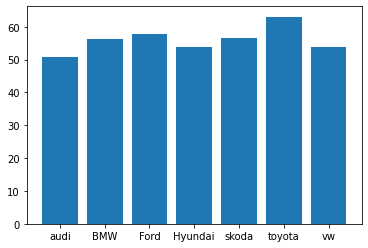

In [ ]:
plt.bar(*zip(*marcas_autonomia.items()))
plt.legend
plt.show()

GRÁFICO DE PREÇO POR MARCA

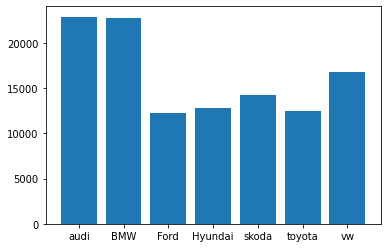

In [ ]:
plt.bar(*zip(*marcas_preco.items()))
plt.show()

GRÁFICO DE CUSTO BENEFÍCIO POR MARCA



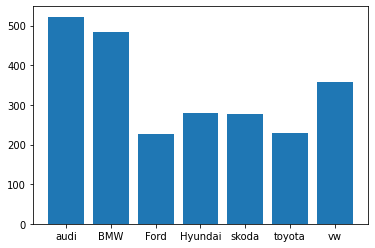

In [ ]:
plt.bar(*zip(*marcas_custbnf.items()))
plt.show()